In [2]:
# -*- coding: utf-8 -*-
import os
import codecs
def readfile(filename):
	#current_path=os.path.abspath(os.curdir)
	file_path=os.path.join("/Users/tree/Desktop/SMLP1/data",filename)
	if not os.path.exists(file_path):
		print("error:file not found:"+filename)
		return ""
	f=codecs.open(file_path,"r","utf-8")
	s=f.read()
	f.close()
	return s
test_data=readfile("test-public.txt")
test_data=test_data.splitlines()
print("length of testing data:"+str(len(test_data)))
train_data=readfile("train.txt")
train_data=train_data.splitlines()
print("length of training data:"+str(len(train_data)))

length of testing data:2001
length of training data:20000


# Graph

## Train data

In [12]:
import numpy as np
positive_train = np.load("/Users/tree/Documents/GitHub/SMLProject/train_data_10k/positive_train.npy").tolist()
negative_train = np.load("/Users/tree/Documents/GitHub/SMLProject/train_data_10k/negative_train.npy").tolist()

In [13]:
print(len(negative_train))

10000


In [5]:
print(positive_train[0:10])

[[1277201, 1098760], [1557862, 1209171], [362256, 4693295], [887693, 2381188], [2917576, 1847640], [2245586, 1881447], [11193, 1242964], [2064376, 3114820], [291591, 610015], [1336304, 1032341]]


## Test data

In [3]:
del test_data[0]

test_edges = []
for temp_str in test_data:
  temp = temp_str.split('\t')
  temp_list=[]
  temp_list.append(int(temp[1]))
  temp_list.append(int(temp[2]))
  test_edges.append(temp_list)

In [7]:
print(test_edges[0:10])

[[3563811, 3600160], [2052043, 1401960], [4517994, 1690636], [1660006, 4349447], [581111, 1882617], [1039683, 1365102], [4017576, 1291219], [1859935, 1059674], [4337137, 3648097], [2682050, 3501635]]


## Get undirected graph

In [ ]:
## unsuccessful
import networkx as nx

edge_list = []
import networkx as nx
G = nx.Graph()
for temp_str in train_data:
  temp=temp_str.split('\t')
  for i in range(1, len(temp)):
    temp_edge = (int(temp[0]), int(temp[i]))
    edge_list.append(temp_edge)
G.add_edges_from(edge_list)


In [8]:
##successful
import networkx as nx

G=nx.Graph()
for temp_str in train_data:
  temp=temp_str.split('\t')
  temp_list=[int(i) for i in temp]
  temp_edges=[(temp_list[0], temp_list[i]) for i in range(1, len(temp_list))]
  G.add_edges_from(temp_edges)

In [9]:
print('number of nodes',G.number_of_nodes())
print('number of edges',G.number_of_edges())

number of nodes 4867136
number of edges 23416061


In [ ]:
import matplotlib.pyplot as plt
nx.draw(SG)

In [ ]:
print("Generating community......")
from networkx.algorithms import community

comms = list(community.asyn_fluidc(G,100))
print("Size of communities:"+str(len(comms)))

print("Adding community attribute......")
count=0
for node in G.nodes():
    if(count%100==0):
        print(count)
    count+=1
    for i in range(len(comms)):
        if node in comms[i]:
            G.nodes[node]['community'] = i

## features

In [15]:
def get_positive_features():
    features = []
    count = 0
    print("Generating positive features......")
    for temp_data in positive_train:
      if (count % 100 == 0):
        print(count)
      count += 1
      feature = []
      try:
        preds = nx.resource_allocation_index(DG, [temp_data])
        for u, v, p in preds:
          feature.append(p)
        
        preds = nx.jaccard_coefficient(DG, [temp_data])
        for u, v, p in preds:
          feature.append(p)
          
#         preds = nx.adamic_adar_index(DG, [temp_data])
#         for u, v, p in preds:
#           feature.append(p)

        # preds = nx.nx.preferential_attachment(G, [temp_data])
        # for u, v, p in preds:
        #   feature.append(p)

        # preds = nx.cn_soundarajan_hopcroft(G, [temp_data])
        # for u, v, p in preds:
        #   feature.append(p)

        # preds = nx.ra_index_soundarajan_hopcroft(G, [temp_data])
        # for u, v, p in preds:
        #   feature.append(p)
        
        # preds = nx.within_inter_cluster(G, [temp_data])
        # for u, v, p in preds:
        #   feature.append(p)          
        
        feature.append(1)  # label=1
        
      except:
        print("one error at: "+str(count))
        pass
      
      features.append(feature)
    print("positive features: "+str(len(features)))
    return features

In [ ]:
a = get_positive_features()

In [6]:
#print(a)

In [17]:
def get_negative_features():
    features = []
    count = 0
    print("Generating negative features......")
    for temp_data in negative_train:
      if (count % 100 == 0):
        print(count)
      count += 1
      feature = []
      try:
        preds = nx.resource_allocation_index(DG, [temp_data])
        for u, v, p in preds:
          feature.append(p)
        
        preds = nx.jaccard_coefficient(DG, [temp_data])
        for u, v, p in preds:
          feature.append(p)
          
        preds = nx.adamic_adar_index(DG, [temp_data])
        for u, v, p in preds:
          feature.append(p)

        preds = nx.nx.preferential_attachment(G, [temp_data])
        for u, v, p in preds:
          feature.append(p)

        # preds = nx.cn_soundarajan_hopcroft(G, [temp_data])
        # for u, v, p in preds:
        #   feature.append(p)

        # preds = nx.ra_index_soundarajan_hopcroft(G, [temp_data])
        # for u, v, p in preds:
        #   feature.append(p)
        
        # preds = nx.within_inter_cluster(G, [temp_data])
        # for u, v, p in preds:
        #   feature.append(p)          
        
        feature.append(0)  # label=1
        
      except:
        print("one error at: "+str(count))
        pass
      
      features.append(feature)
    print("negative features: "+str(len(features)))
    return features

In [9]:
def get_test_features():
    features = []
    count = 0
    print("Generating test data features......")
    for temp_data in test_edges:
      if (count % 100 == 0):
        print(count)
      count += 1
      feature = []
      try:
        preds = nx.resource_allocation_index(DG, [temp_data])
        for u, v, p in preds:
          feature.append(p)
        
        preds = nx.jaccard_coefficient(DG, [temp_data])
        for u, v, p in preds:
          feature.append(p)
          
        preds = nx.adamic_adar_index(DG, [temp_data])
        for u, v, p in preds:
          feature.append(p)

        # preds = nx.nx.preferential_attachment(G, [temp_data])
        # for u, v, p in preds:
        #   feature.append(p)

        # preds = nx.cn_soundarajan_hopcroft(G, [temp_data])
        # for u, v, p in preds:
        #   feature.append(p)

        # preds = nx.ra_index_soundarajan_hopcroft(G, [temp_data])
        # for u, v, p in preds:
        #   feature.append(p)
        
        # preds = nx.within_inter_cluster(G, [temp_data])
        # for u, v, p in preds:
        #   feature.append(p)          
        
        
      except:
        print("one error at: "+str(count))
        pass
      
      features.append(feature)
    print("test features: "+str(len(features)))
    return features

## Combine

In [16]:
#a = get_positive_features()
train_features = get_positive_features() + get_negative_features()

Generating positive features......
0
one error at: 1
one error at: 2
one error at: 3
one error at: 4
one error at: 5
one error at: 6
one error at: 7
one error at: 8
one error at: 9
one error at: 10
one error at: 11
one error at: 12
one error at: 13
one error at: 14
one error at: 15
one error at: 16
one error at: 17
one error at: 18
one error at: 19
one error at: 20
one error at: 21
one error at: 22
one error at: 23
one error at: 24
one error at: 25
one error at: 26
one error at: 27
one error at: 28
one error at: 29
one error at: 30
one error at: 31
one error at: 32
one error at: 33
one error at: 34
one error at: 35
one error at: 36
one error at: 37
one error at: 38
one error at: 39
one error at: 40
one error at: 41
one error at: 42
one error at: 43
one error at: 44
one error at: 45
one error at: 46
one error at: 47
one error at: 48
one error at: 49
one error at: 50
one error at: 51
one error at: 52
one error at: 53
one error at: 54
one error at: 55
one error at: 56
one error at: 57
one

one error at: 2266
one error at: 2267
one error at: 2268
one error at: 2269
one error at: 2270
one error at: 2271
one error at: 2272
one error at: 2273
one error at: 2274
one error at: 2275
one error at: 2276
one error at: 2277
one error at: 2278
one error at: 2279
one error at: 2280
one error at: 2281
one error at: 2282
one error at: 2283
one error at: 2284
one error at: 2285
one error at: 2286
one error at: 2287
one error at: 2288
one error at: 2289
one error at: 2290
one error at: 2291
one error at: 2292
one error at: 2293
one error at: 2294
one error at: 2295
one error at: 2296
one error at: 2297
one error at: 2298
one error at: 2299
one error at: 2300
2300
one error at: 2301
one error at: 2302
one error at: 2303
one error at: 2304
one error at: 2305
one error at: 2306
one error at: 2307
one error at: 2308
one error at: 2309
one error at: 2310
one error at: 2311
one error at: 2312
one error at: 2313
one error at: 2314
one error at: 2315
one error at: 2316
one error at: 2317
one err

one error at: 3578
one error at: 3579
one error at: 3580
one error at: 3581
one error at: 3582
one error at: 3583
one error at: 3584
one error at: 3585
one error at: 3586
one error at: 3587
one error at: 3588
one error at: 3589
one error at: 3590
one error at: 3591
one error at: 3592
one error at: 3593
one error at: 3594
one error at: 3595
one error at: 3596
one error at: 3597
one error at: 3598
one error at: 3599
one error at: 3600
3600
one error at: 3601
one error at: 3602
one error at: 3603
one error at: 3604
one error at: 3605
one error at: 3606
one error at: 3607
one error at: 3608
one error at: 3609
one error at: 3610
one error at: 3611
one error at: 3612
one error at: 3613
one error at: 3614
one error at: 3615
one error at: 3616
one error at: 3617
one error at: 3618
one error at: 3619
one error at: 3620
one error at: 3621
one error at: 3622
one error at: 3623
one error at: 3624
one error at: 3625
one error at: 3626
one error at: 3627
one error at: 3628
one error at: 3629
one err

one error at: 6067
one error at: 6068
one error at: 6069
one error at: 6070
one error at: 6071
one error at: 6072
one error at: 6073
one error at: 6074
one error at: 6075
one error at: 6076
one error at: 6077
one error at: 6078
one error at: 6079
one error at: 6080
one error at: 6081
one error at: 6082
one error at: 6083
one error at: 6084
one error at: 6085
one error at: 6086
one error at: 6087
one error at: 6088
one error at: 6089
one error at: 6090
one error at: 6091
one error at: 6092
one error at: 6093
one error at: 6094
one error at: 6095
one error at: 6096
one error at: 6097
one error at: 6098
one error at: 6099
one error at: 6100
6100
one error at: 6101
one error at: 6102
one error at: 6103
one error at: 6104
one error at: 6105
one error at: 6106
one error at: 6107
one error at: 6108
one error at: 6109
one error at: 6110
one error at: 6111
one error at: 6112
one error at: 6113
one error at: 6114
one error at: 6115
one error at: 6116
one error at: 6117
one error at: 6118
one err

one error at: 8342
one error at: 8343
one error at: 8344
one error at: 8345
one error at: 8346
one error at: 8347
one error at: 8348
one error at: 8349
one error at: 8350
one error at: 8351
one error at: 8352
one error at: 8353
one error at: 8354
one error at: 8355
one error at: 8356
one error at: 8357
one error at: 8358
one error at: 8359
one error at: 8360
one error at: 8361
one error at: 8362
one error at: 8363
one error at: 8364
one error at: 8365
one error at: 8366
one error at: 8367
one error at: 8368
one error at: 8369
one error at: 8370
one error at: 8371
one error at: 8372
one error at: 8373
one error at: 8374
one error at: 8375
one error at: 8376
one error at: 8377
one error at: 8378
one error at: 8379
one error at: 8380
one error at: 8381
one error at: 8382
one error at: 8383
one error at: 8384
one error at: 8385
one error at: 8386
one error at: 8387
one error at: 8388
one error at: 8389
one error at: 8390
one error at: 8391
one error at: 8392
one error at: 8393
one error at

one error at: 14
one error at: 15
one error at: 16
one error at: 17
one error at: 18
one error at: 19
one error at: 20
one error at: 21
one error at: 22
one error at: 23
one error at: 24
one error at: 25
one error at: 26
one error at: 27
one error at: 28
one error at: 29
one error at: 30
one error at: 31
one error at: 32
one error at: 33
one error at: 34
one error at: 35
one error at: 36
one error at: 37
one error at: 38
one error at: 39
one error at: 40
one error at: 41
one error at: 42
one error at: 43
one error at: 44
one error at: 45
one error at: 46
one error at: 47
one error at: 48
one error at: 49
one error at: 50
one error at: 51
one error at: 52
one error at: 53
one error at: 54
one error at: 55
one error at: 56
one error at: 57
one error at: 58
one error at: 59
one error at: 60
one error at: 61
one error at: 62
one error at: 63
one error at: 64
one error at: 65
one error at: 66
one error at: 67
one error at: 68
one error at: 69
one error at: 70
one error at: 71
one error at: 

one error at: 1893
one error at: 1894
one error at: 1895
one error at: 1896
one error at: 1897
one error at: 1898
one error at: 1899
one error at: 1900
1900
one error at: 1901
one error at: 1902
one error at: 1903
one error at: 1904
one error at: 1905
one error at: 1906
one error at: 1907
one error at: 1908
one error at: 1909
one error at: 1910
one error at: 1911
one error at: 1912
one error at: 1913
one error at: 1914
one error at: 1915
one error at: 1916
one error at: 1917
one error at: 1918
one error at: 1919
one error at: 1920
one error at: 1921
one error at: 1922
one error at: 1923
one error at: 1924
one error at: 1925
one error at: 1926
one error at: 1927
one error at: 1928
one error at: 1929
one error at: 1930
one error at: 1931
one error at: 1932
one error at: 1933
one error at: 1934
one error at: 1935
one error at: 1936
one error at: 1937
one error at: 1938
one error at: 1939
one error at: 1940
one error at: 1941
one error at: 1942
one error at: 1943
one error at: 1944
one err

one error at: 3349
one error at: 3350
one error at: 3351
one error at: 3352
one error at: 3353
one error at: 3354
one error at: 3355
one error at: 3356
one error at: 3357
one error at: 3358
one error at: 3359
one error at: 3360
one error at: 3361
one error at: 3362
one error at: 3363
one error at: 3364
one error at: 3365
one error at: 3366
one error at: 3367
one error at: 3368
one error at: 3369
one error at: 3370
one error at: 3371
one error at: 3372
one error at: 3373
one error at: 3374
one error at: 3375
one error at: 3376
one error at: 3377
one error at: 3378
one error at: 3379
one error at: 3380
one error at: 3381
one error at: 3382
one error at: 3383
one error at: 3384
one error at: 3385
one error at: 3386
one error at: 3387
one error at: 3388
one error at: 3389
one error at: 3390
one error at: 3391
one error at: 3392
one error at: 3393
one error at: 3394
one error at: 3395
one error at: 3396
one error at: 3397
one error at: 3398
one error at: 3399
one error at: 3400
3400
one err

one error at: 4473
one error at: 4474
one error at: 4475
one error at: 4476
one error at: 4477
one error at: 4478
one error at: 4479
one error at: 4480
one error at: 4481
one error at: 4482
one error at: 4483
one error at: 4484
one error at: 4485
one error at: 4486
one error at: 4487
one error at: 4488
one error at: 4489
one error at: 4490
one error at: 4491
one error at: 4492
one error at: 4493
one error at: 4494
one error at: 4495
one error at: 4496
one error at: 4497
one error at: 4498
one error at: 4499
one error at: 4500
4500
one error at: 4501
one error at: 4502
one error at: 4503
one error at: 4504
one error at: 4505
one error at: 4506
one error at: 4507
one error at: 4508
one error at: 4509
one error at: 4510
one error at: 4511
one error at: 4512
one error at: 4513
one error at: 4514
one error at: 4515
one error at: 4516
one error at: 4517
one error at: 4518
one error at: 4519
one error at: 4520
one error at: 4521
one error at: 4522
one error at: 4523
one error at: 4524
one err

one error at: 5509
one error at: 5510
one error at: 5511
one error at: 5512
one error at: 5513
one error at: 5514
one error at: 5515
one error at: 5516
one error at: 5517
one error at: 5518
one error at: 5519
one error at: 5520
one error at: 5521
one error at: 5522
one error at: 5523
one error at: 5524
one error at: 5525
one error at: 5526
one error at: 5527
one error at: 5528
one error at: 5529
one error at: 5530
one error at: 5531
one error at: 5532
one error at: 5533
one error at: 5534
one error at: 5535
one error at: 5536
one error at: 5537
one error at: 5538
one error at: 5539
one error at: 5540
one error at: 5541
one error at: 5542
one error at: 5543
one error at: 5544
one error at: 5545
one error at: 5546
one error at: 5547
one error at: 5548
one error at: 5549
one error at: 5550
one error at: 5551
one error at: 5552
one error at: 5553
one error at: 5554
one error at: 5555
one error at: 5556
one error at: 5557
one error at: 5558
one error at: 5559
one error at: 5560
one error at

one error at: 6653
one error at: 6654
one error at: 6655
one error at: 6656
one error at: 6657
one error at: 6658
one error at: 6659
one error at: 6660
one error at: 6661
one error at: 6662
one error at: 6663
one error at: 6664
one error at: 6665
one error at: 6666
one error at: 6667
one error at: 6668
one error at: 6669
one error at: 6670
one error at: 6671
one error at: 6672
one error at: 6673
one error at: 6674
one error at: 6675
one error at: 6676
one error at: 6677
one error at: 6678
one error at: 6679
one error at: 6680
one error at: 6681
one error at: 6682
one error at: 6683
one error at: 6684
one error at: 6685
one error at: 6686
one error at: 6687
one error at: 6688
one error at: 6689
one error at: 6690
one error at: 6691
one error at: 6692
one error at: 6693
one error at: 6694
one error at: 6695
one error at: 6696
one error at: 6697
one error at: 6698
one error at: 6699
one error at: 6700
6700
one error at: 6701
one error at: 6702
one error at: 6703
one error at: 6704
one err

one error at: 7937
one error at: 7938
one error at: 7939
one error at: 7940
one error at: 7941
one error at: 7942
one error at: 7943
one error at: 7944
one error at: 7945
one error at: 7946
one error at: 7947
one error at: 7948
one error at: 7949
one error at: 7950
one error at: 7951
one error at: 7952
one error at: 7953
one error at: 7954
one error at: 7955
one error at: 7956
one error at: 7957
one error at: 7958
one error at: 7959
one error at: 7960
one error at: 7961
one error at: 7962
one error at: 7963
one error at: 7964
one error at: 7965
one error at: 7966
one error at: 7967
one error at: 7968
one error at: 7969
one error at: 7970
one error at: 7971
one error at: 7972
one error at: 7973
one error at: 7974
one error at: 7975
one error at: 7976
one error at: 7977
one error at: 7978
one error at: 7979
one error at: 7980
one error at: 7981
one error at: 7982
one error at: 7983
one error at: 7984
one error at: 7985
one error at: 7986
one error at: 7987
one error at: 7988
one error at

one error at: 8974
one error at: 8975
one error at: 8976
one error at: 8977
one error at: 8978
one error at: 8979
one error at: 8980
one error at: 8981
one error at: 8982
one error at: 8983
one error at: 8984
one error at: 8985
one error at: 8986
one error at: 8987
one error at: 8988
one error at: 8989
one error at: 8990
one error at: 8991
one error at: 8992
one error at: 8993
one error at: 8994
one error at: 8995
one error at: 8996
one error at: 8997
one error at: 8998
one error at: 8999
one error at: 9000
9000
one error at: 9001
one error at: 9002
one error at: 9003
one error at: 9004
one error at: 9005
one error at: 9006
one error at: 9007
one error at: 9008
one error at: 9009
one error at: 9010
one error at: 9011
one error at: 9012
one error at: 9013
one error at: 9014
one error at: 9015
one error at: 9016
one error at: 9017
one error at: 9018
one error at: 9019
one error at: 9020
one error at: 9021
one error at: 9022
one error at: 9023
one error at: 9024
one error at: 9025
one err

In [24]:
print(train_features[0:10])
print(train_features[50000:50010])

[[0.0070345370107602065, 0.020202020202020204, 0.6166364398245464, 1], [0.8129166955201761, 0.15457413249211358, 10.860489695414518, 1], [0.15708911463295055, 0.05537459283387622, 3.341034563139729, 1], [0, 0.0, 0, 1], [0.00014762326542663124, 0.007575757575757576, 0.11336779747070114, 1], [0.01095926780069149, 0.02833099579242637, 10.1095765452132, 1], [0.007280013033079584, 0.03536977491961415, 2.618418612510432, 1], [0.018252259570541336, 0.041666666666666664, 1.028173064213441, 1], [0.00016406890894175554, 0.017241379310344827, 0.11474174332071754, 1], [0, 0.0, 0, 1]]
[[0, 0.0, 0, 0], [0, 0.0, 0, 0], [5.399276496949409e-05, 0.05263157894736842, 0.1017639715703464, 0], [0, 0.0, 0, 0], [0, 0.0, 0, 0], [0, 0.0, 0, 0], [0, 0.0, 0, 0], [0, 0.0, 0, 0], [0, 0.0, 0, 0], [0, 0.0, 0, 0]]


In [26]:
print(len(train_features))

100000


In [ ]:
test_features = get_test_features()

In [17]:
print(test_features[0:10])

[[0, 0.0], [0, 0.0], [0.0046237897060301255, 0.011152416356877323], [2.809273297149788e-05, 0.003669724770642202], [0, 0.0], [0, 0.0], [1.1639411045801083e-05, 0.0025188916876574307], [2.32067020955652e-05, 0.0019342359767891683], [0, 0.0], [0, 0.0]]


## Save features

In [27]:
import csv

with open("train_50k_3F.csv","w",newline="") as csvfile:
  writer=csv.writer(csvfile)
  #writer.writerow(["RA","JC","Label"])
  writer.writerow(["RA","JC","AA","Label"])
  #writer.writerow(["RA","JC","AA","PA","CSH","RSH","WIC","Label"])
  writer.writerows(train_features)

In [28]:
with open("test_50k_3F.csv","w",newline="") as csvfile:
  writer=csv.writer(csvfile)
  #writer.writerow(["RA","JC"])
  writer.writerow(["RA","JC","AA"])
  #writer.writerow(["RA","JC","AA","PA","CSH","RSH","WIC"])
  writer.writerows(test_features)

## Directed Graph

In [ ]:
import networkx as nx

graph_data = []
for temp_str in train_data:
  temp = temp_str.split('\t')
  temp_list = [int(i) for i in temp]
  temp_edges = [(temp_list[0], temp_list[i]) for i in range(1, len(temp_list))]
  #graph_data = graph_data + temp_edges

In [ ]:
DG=nx.DiGraph()
for temp_edges in graph_data:
  DG.add_edges_from(temp_edges)

In [3]:
##successful
import networkx as nx

DG=nx.DiGraph()
for temp_str in train_data:
  temp=temp_str.split('\t')
  temp_list=[int(i) for i in temp]
  temp_edges=[(temp_list[0], temp_list[i]) for i in range(1, len(temp_list))]
  DG.add_edges_from(temp_edges)

In [18]:
print('number of nodes',DG.number_of_nodes())
print('number of edges',DG.number_of_edges())

number of nodes 4867136
number of edges 23946602


In [4]:
DGtest=nx.DiGraph()
for temp_str in train_data[0:3]:
  temp=temp_str.split('\t')[0:10]
  temp_list=[int(i) for i in temp]
  temp_edges=[(temp_list[0], temp_list[i]) for i in range(1, len(temp_list))]
  DGtest.add_edges_from(temp_edges)

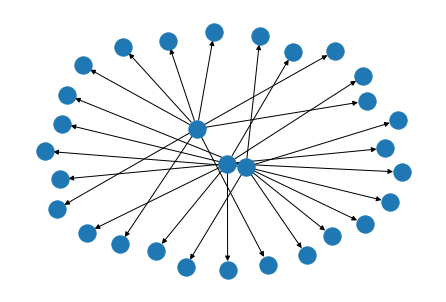

In [5]:
import matplotlib.pyplot as plt
nx.draw(DGtest)

In [ ]:
DGtest.out_edges()
DGtest.in_degree()

DGtest.successors()
DGtest.predecessors()

In [17]:
list(DGtest.successors(540762))

[1912140,
 1537559,
 3091331,
 2757277,
 3237295,
 1070876,
 4008078,
 1824878,
 1005927]

In [19]:
DGtest.out_edges(540762)
#DGtest.out_degree(540762)

OutEdgeDataView([(540762, 1912140), (540762, 1537559), (540762, 3091331), (540762, 2757277), (540762, 3237295), (540762, 1070876), (540762, 4008078), (540762, 1824878), (540762, 1005927)])

In [ ]:
from scipy.sparse import csr_matrix
import csv
import numpy as np
print("Loading samples......")


########################################################################################################
print("Generating matrix......")
with open('train.txt','r') as train:
    row=[]
    col=[]
    data=[]
    for line in train:
        neighbour_list=[int(i) for i in line.split()]
        for i in range(1,len(neighbour_list)):
            row.append(neighbour_list[0])
            col.append(neighbour_list[i])
            data.append(1)
    source_sink_matrix=csr_matrix((data,(row,col)),shape=(4867136,4867136))
    sink_source_matrix=csr_matrix((data,(col,row)),shape=(4867136,4867136)) # row slicing is fater than column slicing in csr_matrix
################################### Feature method ###################################################
import numpy as np
from math import sqrt

def cos_sim(X,Y):
    try:
        return (np.dot(X,Y.T)/(sqrt(X.nnz)*sqrt(Y.nnz))).toarray()[0][0]
    except:
        return 0

def suc_size(key):
    return source_sink_matrix[key].nnz
def pre_size(key):
    return sink_source_matrix[key].nnz
def pre_pre_set(key1,key2):
    return len(set(sink_source_matrix[key1].nonzero()[1])&set(sink_source_matrix[key2].nonzero()[1]))
def suc_pre_set(key1,key2):
    return len(set(source_sink_matrix[key1].nonzero()[1])&set(sink_source_matrix[key2].nonzero()[1]))
def pre_pre_cos(key1,key2):
    return cos_sim(sink_source_matrix[key1],sink_source_matrix[key2])
def suc_pre_cos(key1,key2):
    return cos_sim(source_sink_matrix[key1],sink_source_matrix[key2])
def wuyifan(key1,key2):
    feature=[0]*100
    i=0
    for key in source_sink_matrix[key1].nonzero()[1]:
        feature[i]=(cos_sim(sink_source_matrix[key],sink_source_matrix[key2]))
        i+=1
        if (i >= 100):
            break
    feature.sort(reverse=True)
    return feature

######################################## Generating features #############################################################
def generate_positive_features():
    features = []
    count = 0
    print("Generating positive features......")
    for sample in positive_samples:
        if (count % 10 == 0):
            print(count)
        count += 1
        feature = []
        try:
            feature.append(suc_size(sample[0]))
            feature.append(suc_size(sample[1]))
            feature.append(pre_size(sample[0]))
            feature.append(pre_size(sample[1]))
            feature.append(pre_pre_set(sample[0],sample[1]))
            feature.append(suc_pre_set(sample[0], sample[1]))
            feature.append(pre_pre_cos(sample[0], sample[1]))
            feature.append(suc_pre_cos(sample[0], sample[1]))
            feature.extend(wuyifan(sample[0], sample[1]))
            feature.append(1)  # label=1

        except:
            print("one error at: " + str(count))
            pass
        features.append(feature)
    print("positive features: " + str(len(features)))
    return features

def generate_negative_features():
    features = []
    count = 0
    print("Generating negative features......")
    for sample in negative_samples:
        if (count % 10 == 0):
            print(count)
        count += 1
        feature = []
        try:
            feature.append(suc_size(sample[0]))
            feature.append(suc_size(sample[1]))
            feature.append(pre_size(sample[0]))
            feature.append(pre_size(sample[1]))
            feature.append(pre_pre_set(sample[0],sample[1]))
            feature.append(suc_pre_set(sample[0], sample[1]))
            feature.append(pre_pre_cos(sample[0], sample[1]))
            feature.append(suc_pre_cos(sample[0], sample[1]))
            feature.extend(wuyifan(sample[0], sample[1]))
            feature.append(0)  # label=0
        except:
            print("one error at: " + str(count))
            pass
        features.append(feature)
    print("negative features: " + str(len(features)))
    return features

def generate_test_features():
    features = []
    count = 0
    print("Generating test features......")
    for sample in test_samples:
        if (count % 10 == 0):
            print(count)
        count += 1
        feature = []
        try:
            feature.append(suc_size(sample[0]))
            feature.append(suc_size(sample[1]))
            feature.append(pre_size(sample[0]))
            feature.append(pre_size(sample[1]))
            feature.append(pre_pre_set(sample[0],sample[1]))
            feature.append(suc_pre_set(sample[0], sample[1]))
            feature.append(pre_pre_cos(sample[0], sample[1]))
            feature.append(suc_pre_cos(sample[0], sample[1]))
            feature.extend(wuyifan(sample[0], sample[1]))
        except:
            print("one error at: " + str(count))
            pass
        features.append(feature)
    print("test features: " + str(len(features)))
    return features
##############################################################################################################
def generate_traning_data():
    positive_features = generate_positive_features()
    negative_features = generate_negative_features()
    features = positive_features + negative_features
    # random.shuffle(features)
    return features

traning_data = generate_traning_data()

def write_train_to_csv(traning_data):
    with open("train_directed.csv", "w", newline="") as csvfile:
        writer = csv.writer(csvfile)
        # writer.writerow(["RA", "JC", "AA", "PA", "CSH", "RSH", "WIC", "Label"])
        writer.writerows(traning_data)
write_train_to_csv(traning_data)

def write_test_to_csv(test_data):
    with open("test_directed.csv", "w", newline="") as csvfile:
        writer = csv.writer(csvfile)
        # writer.writerow(["SA", "SB", "PA", "PPS", "SPS", "PPC", "SPC","WYF"])
        writer.writerows(test_data)
test_data = generate_test_features()
write_test_to_csv(test_data)

In [83]:
from scipy import sparse
from scipy.sparse import csr_matrix
row = np.array([2, 2, 3, 19, 10, 15, 5])
col = np.array([9, 8, 2, 2, 10, 1, 2])
data = np.array([1, 1, 1, 1, 1, 1,1])
x = csr_matrix((data, (row, col)), shape=(20, 20)).toarray()

In [84]:
print(x)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [74]:
import numpy as np
from math import sqrt

x[2].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [85]:
x[2].nonzero()

(array([8, 9]),)